In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
df.shape

(8693, 14)

In [9]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
def total_spend(df):
    df['total_spend'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
    return df

df = total_spend(df)

In [15]:
df = df.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], axis = 1)

In [20]:
df.dropna(inplace= True)

In [170]:
from cmath import nan


def deck_num_side(df):
    try:
        df['deck'] = df['Cabin'].map(lambda x : x.split('/')[0])
        df['side'] = df['Cabin'].map(lambda x : x.split('/')[2])
    
    except:
        df['deck'] = nan
        df['side'] = nan
    return df

In [30]:
df = deck_num_side(df)

In [32]:
df.drop('Cabin', axis = 1, inplace = True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,total_spend,deck,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0,F,S


In [70]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,total_spend,deck,side
0,0001_01,Europa,0,TRAPPIST-1e,"(35.55, 39.5]",False,Maham Ofracculy,0,0.0,B,P
1,0002_01,Earth,0,TRAPPIST-1e,"(23.7, 27.65]",False,Juanna Vines,1,736.0,F,S
2,0003_01,Europa,0,TRAPPIST-1e,"(55.3, 59.25]",True,Altark Susent,0,10383.0,A,S
3,0003_02,Europa,0,TRAPPIST-1e,"(31.6, 35.55]",False,Solam Susent,0,5176.0,A,S
4,0004_01,Earth,0,TRAPPIST-1e,"(15.8, 19.75]",False,Willy Santantines,1,1091.0,F,S


In [65]:
df.CryoSleep.replace(False,0, inplace=True)
df.CryoSleep.replace(True,1, inplace=True)


<AxesSubplot: xlabel='HomePlanet', ylabel='Transported'>

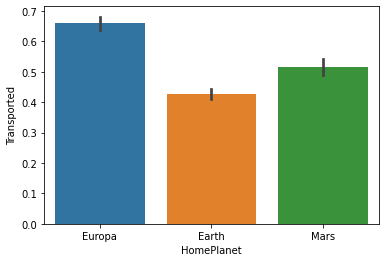

In [63]:
sns.barplot(data = df, x=df['HomePlanet'], y= df['Transported'])

<AxesSubplot: xlabel='CryoSleep', ylabel='Transported'>

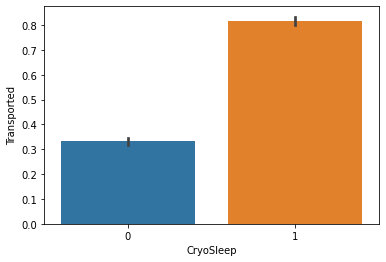

In [66]:
sns.barplot(data = df, x=df['CryoSleep'], y= df['Transported'])


In [67]:
df['Age'] = pd.cut(df['Age'], bins = 20)

<AxesSubplot: xlabel='Transported', ylabel='Age'>

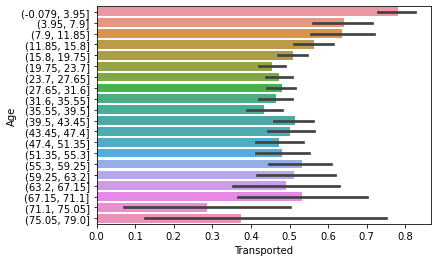

In [71]:
sns.barplot(data = df, y=df['Age'], x= df['Transported'])


In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [109]:
df = df.apply(LabelEncoder().fit_transform)

In [145]:
Features = ['HomePlanet','CryoSleep','Destination','VIP','total_spend','deck','side','Age']


In [146]:
X = df[Features]
y = df['Transported']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 2)


In [148]:
X_test.dtypes

HomePlanet     int64
CryoSleep      int64
Destination    int64
VIP            int64
total_spend    int64
deck           int64
side           int64
Age            int64
dtype: object

In [149]:
scaler1 = StandardScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [151]:
from enum import auto


models_param = {
    'LogisticRegression':{
        'model': LogisticRegression(),
    'params':{'C': [1,10,20]
    }},   
     'svm':{
        'model' : svm.SVC(gamma='auto'),
        'params':{'kernel':['rbf', 'linear'],
        #'gamma': [0.1,1,10],
        'C' : [1,10,20]
    }},
    'knn': {
        'model': KNeighborsClassifier(),
        'params':{'n_neighbors': [1,10,20]
    }},
}

In [155]:
score = []

for model, mp in models_param.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score= False)
    clf.fit(X_train,y_train)
    score.append({
        'model': model,
        'best_score': clf.best_score_,
        'best_param': clf.best_params_
    })

In [156]:
score

[{'model': 'LogisticRegression',
  'best_score': 0.7229396017889396,
  'best_param': {'C': 1}},
 {'model': 'svm',
  'best_score': 0.7431871936011009,
  'best_param': {'C': 10, 'kernel': 'rbf'}},
 {'model': 'knn',
  'best_score': 0.7394014649809353,
  'best_param': {'n_neighbors': 20}}]

In [157]:
f1 = svm.SVC(C= 10,kernel= 'rbf')
f1.fit(X_train,y_train)

SVC(C=10)

In [161]:
f1.score(X_test,y_test)

0.7390317700453858

In [163]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [164]:
df_test = total_spend(df_test)

In [165]:
df_test = df_test.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], axis = 1)


In [171]:
df_test = deck_num_side(df_test)

In [172]:
df_test['Age'] = pd.cut(df_test['Age'], bins = 20)

In [174]:
df_test = df_test.apply(LabelEncoder().fit_transform)

In [175]:
Xtest = df_test[Features]

In [176]:
Xtest = scaler.transform(Xtest)

C:\Users\ansun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [177]:
final_result = f1.predict(Xtest)

In [180]:
df2 = pd.read_csv('test.csv')
df2['Transported'] = final_result
df2[['PassengerId', 'Transported']].to_csv('spaceship-titanic-prediction.csv',index=False)